<a href="https://colab.research.google.com/github/intergalactichack/obscura/blob/main/gauge_needle_value_reading/Gauge_needle_detection_openvino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

Cloning into 'yolov5'...
remote: Enumerating objects: 15577, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 15577 (delta 79), reused 107 (delta 53), pack-reused 15393
Receiving objects: 100% (15577/15577), 14.58 MiB | 36.24 MiB/s, done.
Resolving deltas: 100% (10608/10608), done.
/content/yolov5
HEAD is now at fbe67e4 Fix `OMP_NUM_THREADS=1` for macOS (#8624)


In [ ]:
from openvino.tools.pot.api import Metric, DataLoader
from openvino.tools.pot.engines.ie_engine import IEEngine
from openvino.tools.pot.graph import load_model, save_model
from openvino.tools.pot.graph.model_utils import compress_model_weights
from openvino.tools.pot.pipeline.initializer import create_pipeline
from openvino.tools.pot.utils.logger import init_logger, get_logger

/usr/local/lib/python3.9/dist-packages/openvino/offline_transformations/__init__.py:10: FutureWarning: The module is private and following namespace `offline_transformations` will be removed in the future, use `openvino.runtime.passes` instead!
  warnings.warn(


In [ ]:
import sys
sys.path.append("./yolov5")

from yolov5.utils.dataloaders import create_dataloader
from yolov5.utils.general import (
    check_dataset,
    non_max_suppression,
    xywh2xyxy,
    check_yaml,
)
from yolov5.utils.metrics import ap_per_class
from yolov5.val import process_batch

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
%ls

CONTRIBUTING.md  export.py   models/       requirements.txt  tutorial.ipynb
data/            hubconf.py  __pycache__/  setup.cfg         utils/
detect.py        LICENSE     README.md     train.py          val.py


In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Images
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)

img = os.path.join('image1.jpg')

results = model(img)
results.print()

# plt.imshow(np.squeeze(results.render()))
# plt.show()

In [1]:
import torch

In [2]:
torch.__version__

'2.0.0+cu118'

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-23 Python-3.9.16 torch-2.0.0+cu118 CPU



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


100%|██████████| 14.1M/14.1M [00:00<00:00, 109MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-23 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


custom_YOLOv5s summary: 232 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 


In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [21]:
!cp /content/gdrive/MyDrive/last.pt .
!cp /content/gdrive/MyDrive/best.pt .

In [12]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)

img = os.path.join('image1.jpg')

results = model(img)
results.print()

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-23 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


custom_YOLOv5s summary: 232 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 360x640 1 base
Speed: 38.5ms pre-process, 431.1ms inference, 26.3ms NMS per image at shape (1, 3, 384, 640)


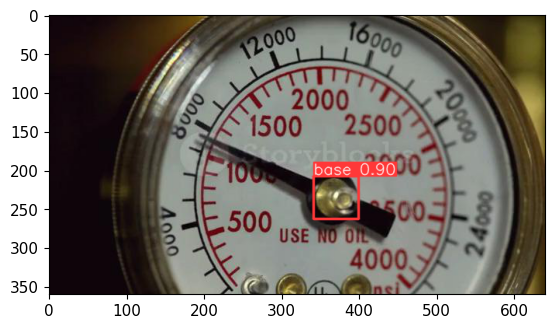

In [15]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-23 Python-3.9.16 torch-2.0.0+cu118 CPU



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 360x640 1 base
Speed: 9.2ms pre-process, 432.7ms inference, 1.3ms NMS per image at shape (1, 3, 384, 640)


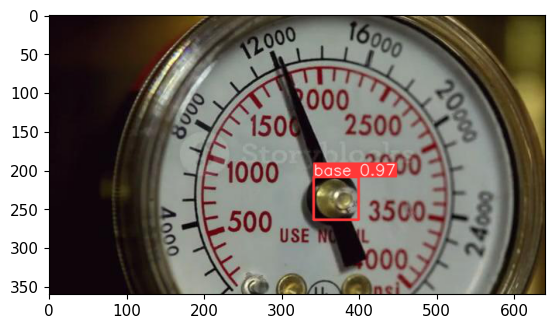

In [36]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

model = torch.hub.load('ultralytics/yolov5', 'custom', path='last.pt')
model.conf = 0.2 
img = os.path.join('image3.jpg')

results = model(img)
results.print()

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [26]:
labels, cord_thres = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()

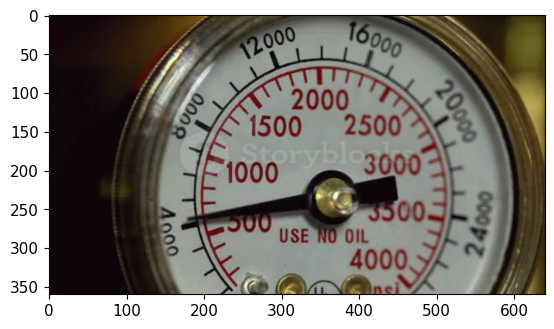

In [115]:
import cv2
import matplotlib.pyplot as plt

ogimage= cv2.imread('image5.jpg')
ogimage = cv2.cvtColor(ogimage, cv2.COLOR_BGR2RGB)
plt.imshow(ogimage)
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-23 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


custom_YOLOv5s summary: 232 layers, 7249215 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 360x640 1 base, 1 needle
Speed: 3.7ms pre-process, 291.2ms inference, 2.4ms NMS per image at shape (1, 3, 384, 640)


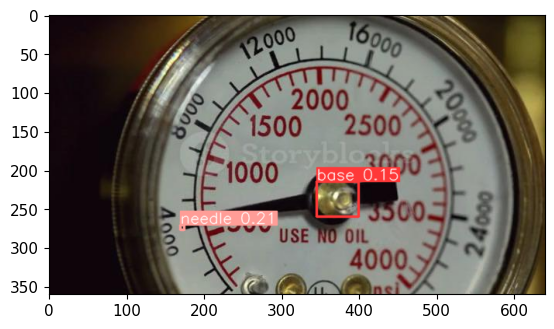

In [252]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')
model.conf = 0.15
# img = os.path.join('image5.jpg')
img = cv2.imread('image5.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

img1 = img

results = model(img1)
results.print()

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [187]:
labels, cord = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()
frame = img
n = len(labels)
x_shape, y_shape = frame.shape[1], frame.shape[0]

In [210]:
import math

ogimg = cv2.imread('image5.jpg')
ogimg = cv2.cvtColor(ogimg, cv2.COLOR_BGR2RGB)
frame = img
center_points = [0,0]
for i in range(n):
  row = cord[i]
  name = labels[i]
  if row[4] >= 0.1:
    if name == 0.0:
      x1, y1, x2, y2 = int(row[0]*x_shape), int(row[1]*y_shape), int(row[2]*x_shape), int(row[3]*y_shape)
      object_coordinates1 = [x1, y1, x2, y2]
      bgr = (0, 255, 0)
      cv2.rectangle(ogimg, (x1, y1), (x2, y2), (0, 255, 0), 2)
      cv2.putText(ogimg, str(labels[i]), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    if name == 1.0:
      x1, y1, x2, y2 = int(row[0]*x_shape), int(row[1]*y_shape), int(row[2]*x_shape), int(row[3]*y_shape)
      object_coordinates2 = [x1, y1, x2, y2]
      bgr = (0, 255, 0)
      cv2.rectangle(ogimg, (x1, y1), (x2, y2), (0, 255, 0), 2)
      cv2.putText(ogimg, str(labels[i]), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

if 0.0 in labels and 1.0 in labels:
  # print("TEST")
  # if name == 0.0:
  center_x_center = int(object_coordinates1[0]  + (object_coordinates1[2] - object_coordinates1[0])/2)
  center_y_center = int(object_coordinates1[1]  + (object_coordinates1[3] - object_coordinates1[1])/2)
  print(name)
  ogimg = cv2.circle(ogimg, [center_x_center, center_y_center], 10, (0, 0, 255), -1)

  # if name == 1.0:
  needle_tip_x_center = int(object_coordinates2[0]  + (object_coordinates2[2] - object_coordinates2[0])/2)
  needle_tip_y_center = int(object_coordinates2[1]  + (object_coordinates2[3] - object_coordinates2[1])/2)
  print(name)
  ogimg = cv2.circle(ogimg, [needle_tip_x_center, needle_tip_y_center], 10, (255, 0, 0), -1)

  dy = needle_tip_y_center - center_y_center
  dx = needle_tip_x_center - center_x_center
  theta = math.atan2(-dy, dx)
  theta = math.degrees(theta)
  theta = round(theta)

  print(theta)

  if theta < 0:
    theta = theta + 360

  print(theta)

  image = cv2.line(ogimg, [needle_tip_x_center, needle_tip_y_center], [center_x_center, center_y_center], (0, 255, 0), 5)

  angle = str(theta) + " deg"
  cv2.putText(ogimg, angle, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

0.0
0.0
-170
190


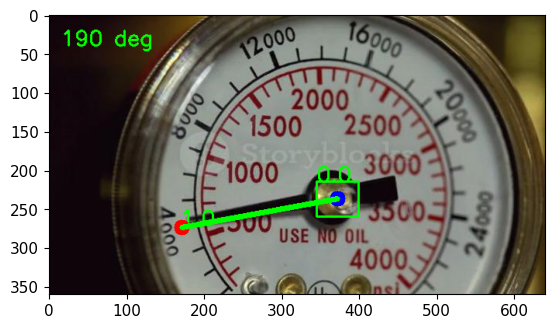

In [211]:
plt.imshow(ogimg)
plt.show()

In [142]:
center_y_center

237

In [138]:
needle_tip_indexes = [index for index, x in enumerate(labels) if x == 1.0]
needle_tip_indexes

[0]

In [78]:
labels

array([          1,           0], dtype=float32)

In [67]:
if 0.0 in labels and 1.0 in labels:
  center_indexes = [index for index, x in enumerate(labels) if x == 0.0]

In [79]:
x1 , x2

(169, 174)

In [241]:
import paho.mqtt.publish as publish

In [240]:
pip install paho-mqtt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62135 sha256=45618be3e6dd1504979e0f54e883c712e8c35e2a8ead5744f0de1bf291b4c52e
  Stored in directory: /root/.cache/pip/wheels/0f/90/29/db29bb8ddc98ec5f2363b959130c9ddbcf5cfdb4a00b6184dd
Successfully built paho-mqtt


In [247]:
import paho.mqtt.publish as publish
import time
import json

measurement = 2.0

payload =  dict()
payload['measurement']=measurement
payload['timestamp']=int(time.time())

payload=json.dumps(payload)
try:
    # publish.single(topic="obscura-numberdisplay", payload=json.dumps(payload), hostname="127.0.0.1")
    publish.single(topic="obscura-gauge", payload=json.dumps(payload), port="11091", hostname="https://f1ff-2a02-3102-4d52-47-3ea3-7a5a-b140-a759.ngrok-free.app")
    # publish.single(topic="obscura-gauge", payload=json.dumps(payload), port="11091", hostname="6.tcp.eu.ngrok.io")
    print("published payload   - " + payload)
except: 
    print("error: could not send payload   - " + payload)

error: could not send payload   - {"measurement": 2.0, "timestamp": 1682241629}
